# Spring 2020 CS4641 Project


### Environment Setup

In [1]:
import os
from scipy import ndimage, misc
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from sklearn import decomposition
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import tree

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

In [4]:
df = pd.read_pickle('dataframe_with_vector_compressed.pkl', compression='zip')

In [5]:
df.head(10)

,track_id,artist_name,duration,loudness,tempo,title,year,lyrics,tags,lyrics_vector
0,TRMMMKI128F931D80D,Lena Philipsson,262.26893,-3.925,122.332,006,1998,"1:23,2:5,3:13,4:10,5:4,6:9,7:1,8:4,9:4,10:1,11...","[[swedish, 100], [pop, 100]]","[0, 23, 5, 13, 10, 4, 9, 1, 4, 4, 1, 2, 2, 2, ..."
1,TRMMMUT128F42646E8,Shawn Colvin,216.47628,-14.379,99.214,(Looking For) The Heart Of Saturday,1994,"2:36,3:25,4:2,5:8,6:2,7:1,8:6,10:8,12:5,13:19,...","[[cover, 100]]","[0, 0, 36, 25, 2, 8, 2, 1, 6, 0, 8, 0, 5, 19, ..."
2,TRMMMQY128F92F0EA3,Dying Fetus,196.02240,-6.366,189.346,Ethos of Coercion,2009,"2:10,3:1,4:2,5:1,9:1,10:1,13:9,14:2,18:1,21:1,...","[[Technical Death Metal, 100], [Brutal Death M...","[0, 0, 10, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 9, 2,..."
3,TRMMMTK128F424EF7C,Emery,217.57342,-4.867,88.423,Rock-N-Rule,2007,"1:20,2:8,3:15,4:4,5:5,6:6,7:2,8:9,9:12,10:2,11...","[[post-hardcore, 100], [emo, 75], [rock, 50], ...","[0, 20, 8, 15, 4, 5, 6, 2, 9, 12, 2, 2, 7, 1, ..."
4,TRMMMQV12903CA201E,Rev. Timothy Wright,353.77587,-7.569,167.850,I Made It Over,0,"1:24,2:1,3:15,4:4,5:4,7:4,8:12,11:2,35:4,40:2,...","[[THE WRIGHT WAY, 100]]","[0, 24, 1, 15, 4, 4, 0, 4, 12, 0, 0, 2, 0, 0, ..."
5,TRMMMNO128F93539AA,Martin Sexton,319.81669,-7.185,187.378,In The Journey,2001,"1:30,2:15,3:4,4:6,5:15,6:5,7:3,8:13,9:11,10:6,...","[[singer-songwriter, 100], [rock, 66], [jazz, ...","[0, 30, 15, 4, 6, 15, 5, 3, 13, 11, 6, 5, 2, 2..."
6,TRMMMPJ128F9306985,Christian Castro,258.89914,-4.660,157.862,Tu Vida Con La Mía,0,"6:1,7:2,38:11,42:5,47:3,77:15,90:6,102:5,104:4...","[[cristian castro, 100], [azul, 100], [Roma, 5...","[0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, ..."
7,TRMMMRZ128F4265EB4,Aerosmith,253.70077,-3.278,67.060,I'm Ready,2004,"1:23,2:1,3:13,4:2,5:2,6:5,7:4,8:2,9:2,12:1,13:...","[[classic rock, 100], [rock, 83], [hard rock, ...","[0, 23, 1, 13, 2, 2, 5, 4, 2, 2, 0, 0, 1, 1, 0..."
8,TRMMMKQ128F92EBCB5,Kreator,372.42730,-6.663,191.665,All of the same blood,2001,"2:12,3:2,4:3,5:4,10:2,12:1,13:9,15:2,17:1,21:2...","[[thrash metal, 100], [metal, 32], [thrash, 23...","[0, 0, 12, 2, 3, 4, 0, 0, 0, 0, 2, 0, 1, 9, 0,..."
9,TRMMMBU128F9305AC3,The Maytals,175.20281,-9.049,156.753,Night And Day,1994,"1:6,2:4,3:4,4:2,5:7,10:1,11:5,13:1,21:2,27:1,2...","[[reggae, 100], [rocksteady, 75], [EARLY REGGA...","[0, 6, 4, 4, 2, 7, 0, 0, 0, 0, 1, 5, 0, 1, 0, ..."


# Tempo

In [5]:
df['tempo'].describe()


count    237662.000000
mean        126.213038
std          34.293760
min           0.000000
25%          99.964000
50%         122.920000
75%         147.897750
max         280.955000
Name: tempo, dtype: float64

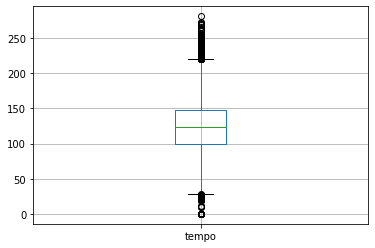

In [6]:
boxplot = df.boxplot(column=['tempo'])

In [7]:
df_tempo = df
df_tempo = df_tempo.drop('artist_name', axis = 1)
df_tempo = df_tempo.drop('duration', axis = 1)
df_tempo = df_tempo.drop('loudness', axis = 1)
df_tempo = df_tempo.drop('title', axis = 1)
df_tempo = df_tempo.drop('year', axis = 1)
df_tempo = df_tempo.drop('lyrics', axis = 1)
df_tempo = df_tempo.drop('tags', axis = 1)
df_tempo.head(10)

,track_id,tempo,lyrics_vector
0,TRMMMKI128F931D80D,122.332,"[0, 23, 5, 13, 10, 4, 9, 1, 4, 4, 1, 2, 2, 2, ..."
1,TRMMMUT128F42646E8,99.214,"[0, 0, 36, 25, 2, 8, 2, 1, 6, 0, 8, 0, 5, 19, ..."
2,TRMMMQY128F92F0EA3,189.346,"[0, 0, 10, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 9, 2,..."
3,TRMMMTK128F424EF7C,88.423,"[0, 20, 8, 15, 4, 5, 6, 2, 9, 12, 2, 2, 7, 1, ..."
4,TRMMMQV12903CA201E,167.850,"[0, 24, 1, 15, 4, 4, 0, 4, 12, 0, 0, 2, 0, 0, ..."
5,TRMMMNO128F93539AA,187.378,"[0, 30, 15, 4, 6, 15, 5, 3, 13, 11, 6, 5, 2, 2..."
6,TRMMMPJ128F9306985,157.862,"[0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, ..."
7,TRMMMRZ128F4265EB4,67.060,"[0, 23, 1, 13, 2, 2, 5, 4, 2, 2, 0, 0, 1, 1, 0..."
8,TRMMMKQ128F92EBCB5,191.665,"[0, 0, 12, 2, 3, 4, 0, 0, 0, 0, 2, 0, 1, 9, 0,..."
9,TRMMMBU128F9305AC3,156.753,"[0, 6, 4, 4, 2, 7, 0, 0, 0, 0, 1, 5, 0, 1, 0, ..."


### We need to remove rows without tempo info, there turns out to be 266 such records.

In [8]:
print(df_tempo['tempo'].describe())
print(df_tempo[df_tempo['tempo'] == 0].count())
df_tempo = df_tempo.replace(0, np.nan)
df_tempo = df_tempo.dropna(how='any', axis=0)
print(df_tempo['tempo'].describe())

count    237662.000000
mean        126.213038
std          34.293760
min           0.000000
25%          99.964000
50%         122.920000
75%         147.897750
max         280.955000
Name: tempo, dtype: float64
track_id         266
tempo            266
lyrics_vector    266
dtype: int64
count    237396.000000
mean        126.354458
std          34.051586
min           9.604000
25%          99.981000
50%         122.950000
75%         147.917000
max         280.955000
Name: tempo, dtype: float64


In [7]:
num_high_tempo = df_tempo[(df_tempo['tempo']>=138)]['track_id'].count()
n = df_tempo['track_id'].count()
print("Number of high tempo: " + str(num_high_tempo))
print("Percentage of high tempo: " + str(num_high_tempo*100/n) + '%')

Number of high tempo: 79078
Percentage of high tempo: 33.31058653052284%


In [11]:
num_low_tempo = df_tempo[(df_tempo['tempo']<108)]['track_id'].count()
print("Number of low tempo: " + str(num_low_tempo))
print("Percentage of low tempo: " + str(num_low_tempo*100/n) + '%')

Number of low tempo: 79525
Percentage of low tempo: 33.49887950934304%


### We define tempo >= 138 as high tempo,  < 108 as low tempo, and others middle tempo to classify our data.
#### High:2, Middle:1, Low:0

In [9]:
def f(row):
    if row['tempo'] >= 138:
        val = 'high'
    elif row['tempo'] < 108:
        val = 'low'
    else:
        val = 'middle'
    return val
df_tempo['tempo_type'] = df_tempo.apply(f, axis=1)
def f2(row):
    if row['tempo'] >= 138:
        val = '2'
    elif row['tempo'] < 108:
        val = '0'
    else:
        val = '1'
    return val
df_tempo['tempo_class'] = df_tempo.apply(f2, axis=1)
df_tempo.head(10)

,track_id,tempo,lyrics_vector,tempo_type,tempo_class
0,TRMMMKI128F931D80D,122.332,"[0, 23, 5, 13, 10, 4, 9, 1, 4, 4, 1, 2, 2, 2, ...",middle,1
1,TRMMMUT128F42646E8,99.214,"[0, 0, 36, 25, 2, 8, 2, 1, 6, 0, 8, 0, 5, 19, ...",low,0
2,TRMMMQY128F92F0EA3,189.346,"[0, 0, 10, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 9, 2,...",high,2
3,TRMMMTK128F424EF7C,88.423,"[0, 20, 8, 15, 4, 5, 6, 2, 9, 12, 2, 2, 7, 1, ...",low,0
4,TRMMMQV12903CA201E,167.850,"[0, 24, 1, 15, 4, 4, 0, 4, 12, 0, 0, 2, 0, 0, ...",high,2
5,TRMMMNO128F93539AA,187.378,"[0, 30, 15, 4, 6, 15, 5, 3, 13, 11, 6, 5, 2, 2...",high,2
6,TRMMMPJ128F9306985,157.862,"[0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, ...",high,2
7,TRMMMRZ128F4265EB4,67.060,"[0, 23, 1, 13, 2, 2, 5, 4, 2, 2, 0, 0, 1, 1, 0...",low,0
8,TRMMMKQ128F92EBCB5,191.665,"[0, 0, 12, 2, 3, 4, 0, 0, 0, 0, 2, 0, 1, 9, 0,...",high,2
9,TRMMMBU128F9305AC3,156.753,"[0, 6, 4, 4, 2, 7, 0, 0, 0, 0, 1, 5, 0, 1, 0, ...",high,2


In [10]:
# Get data to plot
X_tempo = np.array(df_tempo["lyrics_vector"].values.tolist())[:,1:]
print(X_tempo)
print(X_tempo.shape)

y_tempo = np.array(df_tempo["tempo_class"]).astype(int)
print(y_tempo[:20])

[[23  5 13 ...  0  0  0]
 [ 0 36 25 ...  0  0  0]
 [ 0 10  1 ...  0  0  0]
 ...
 [ 0  1  0 ...  0  0  0]
 [ 8  6  6 ...  0  0  0]
 [ 0 15  1 ...  0  0  0]]
(237396, 5000)
[1 0 2 0 2 2 2 0 2 2 1 2 1 1 0 2 1 2 2 2]


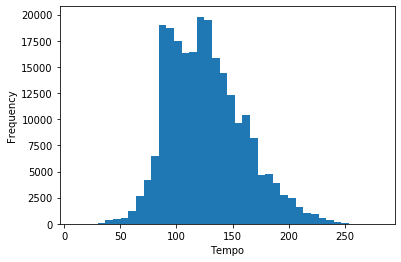

In [12]:
y_tempo_ori = np.array(df_tempo["tempo"])
plt.xlabel('Tempo')
plt.ylabel('Frequency')
plt.hist(y_tempo_ori, bins=40)
plt.show()

In [10]:
X_sum = np.sum(X_tempo, axis = 0)
print(X_sum)
print(X_sum.shape)
bool_sum = np.where(X_sum < 100)
print(bool_sum)

[2077268 1862005 1742669 ...     581     671     316]
(5000,)
(array([], dtype=int64),)


In [26]:
#tempo_data =  np.column_stack((X_tempo, y_tempo))
#print(tempo_data.shape)
#pd.DataFrame(tempo_data).to_pickle("tempo_data.pkl")

# Can start from here

In [27]:
#tempo = pd.read_pickle("tempo_data.pkl")
#print(tempo)

In [25]:
# Apply PCA
print("Starting PCA Decomposition ...")
pca = decomposition.TruncatedSVD(n_components=600)
print("Fitting Data ...")
pca.fit(X_tempo)
print("Transforming X ...")
X_tempo_transform = pca.transform(X_tempo)
print(X_tempo_transform.shape)
variance = pca.explained_variance_ratio_
print("Variance retained by top 20 components")
print(variance[:20])
print("Variance Retained: " + str(np.sum(variance)))

Starting PCA Decomposition ...
Fitting Data ...
Transforming X ...
(237396, 600)
Variance retained by top 20 components
[0.18406227 0.06164153 0.04533659 0.02502127 0.02172392 0.01829149
 0.01549867 0.0147609  0.01313521 0.01195912 0.01044419 0.01004684
 0.00962855 0.00912082 0.00825902 0.00812029 0.0076985  0.00752397
 0.00724222 0.00692411]
Variance Retained: 0.8984975226673326


In [28]:
pd.DataFrame(X_tempo_transform).to_pickle("pca_tempo.pkl")

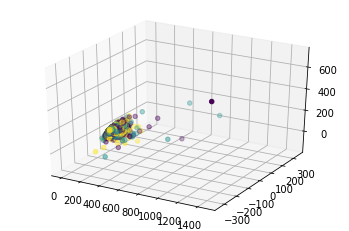

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tempo_transform[:,0], X_tempo_transform[:,1], X_tempo_transform[:,2], c = y_tempo, marker = 'o')
plt.show()

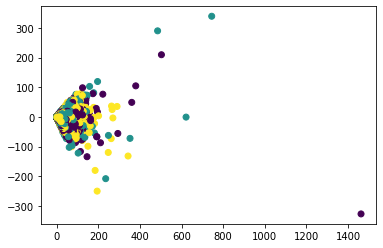

In [25]:
fig, ax = plt.subplots()
ax.scatter(X_tempo_transform[:,0], X_tempo_transform[:,1], c = y_tempo, marker = 'o')
plt.show()

In [11]:
import json
with open("word_list.json", 'r') as w:
    word_list = list(json.load(w))

# Three classes

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_tempo, y_tempo, test_size=0.3, random_state=0)

In [23]:
def accuracy(y_predict, y_test):
    accuracy = 0
    n = y_predict.shape[0]
    for i in range(n):
        if y_predict[i] == y_test[i]:
            accuracy += 1
    accuracy /= n
    return accuracy

## Linear regression

In [18]:
reg = linear_model.LinearRegression().fit(X_train, y_train)

In [24]:
y_pred = reg.predict(X_test)
n = y_pred.shape[0]
y_predict_class = np.zeros(n)
for i in range(n):
    if y_pred[i] >= 138:
        y_predict_class[i] = 2
    elif y_pred[i] < 108:
        y_predict_class[i] = 0
    else:
        y_predict_class[i] = 1
print(accuracy(y_predict_class, y_test))

0.3353880284755473


In [25]:
y_pred = reg.predict(X_train)
n = y_pred.shape[0]
y_predict_class = np.zeros(n)
for i in range(n):
    if y_pred[i] >= 138:
        y_predict_class[i] = 2
    elif y_pred[i] < 108:
        y_predict_class[i] = 0
    else:
        y_predict_class[i] = 1
print(accuracy(y_predict_class, y_train))

0.33481769438610637


## Gaussion Navie Bayes

In [17]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
train_score = gnb.score(X_train, y_train)
test_score = gnb.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))

Train score: 0.3879899143684144
Test score: 0.3538241199679861


## Logistic regression

In [26]:
clf = LogisticRegression(random_state=0, max_iter = 2000).fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))

Train score: 0.4399164746023818
Test score: 0.37353796037574244


## Random Forest

In [13]:
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))

[0.00533835 0.01553227 0.00431389 ... 0.         0.         0.        ]
Train score: 0.38433718264260397
Test score: 0.37585475785955996


In [32]:
X_pca_tempo = pd.read_pickle("pca_tempo.pkl").to_numpy()

In [33]:
print(X_pca_tempo)
print(X_pca_tempo.shape)

[[ 3.07013006e+01  9.22495881e+00  6.59561262e+00 ...  4.03045156e-01
   3.23892730e-01 -3.65760052e-01]
 [ 3.80011641e+01 -2.12355062e+01 -2.29746076e+01 ... -2.60469102e-01
   2.28813747e-01 -4.17079283e-01]
 [ 7.33625047e+00 -8.39224919e+00 -1.69346010e+00 ...  1.06900104e-01
   2.80886702e-02 -5.24934930e-02]
 ...
 [ 2.49272109e+00 -1.51323516e+00 -3.55356870e-01 ...  5.44575898e-01
   4.29338924e-01 -2.89984180e-01]
 [ 1.55468469e+01  1.86691897e-01  9.79141104e-02 ... -2.55036633e-01
   5.10434039e-03  1.17247488e-01]
 [ 2.16487448e+01 -1.60368734e+01 -1.89754529e+00 ...  4.42241620e-01
   3.65240785e-01 -1.67787582e-01]]
(237396, 600)


In [27]:
X_train = X_tempo[:18000,:]
y_train = y_tempo[:18000]
X_test = X_tempo[18000:,:]
y_test = y_tempo[18000:]

In [23]:
clf = LogisticRegression(random_state=0, max_iter = 5000).fit(X_train, y_train)
clf.predict(X_test)

array([2, 1, 1, ..., 1, 1, 2])

In [25]:
y_predict = clf.predict(X_test)

In [50]:
print(accuracy(y_predict, y_test))

0.3508313734069901


## Two Classes

In [14]:
def f3(row):
    if row['tempo'] >= 126:
        val = '1'
    else:
        val = '0'
    return val
df_tempo['tempo_hl'] = df_tempo.apply(f3, axis=1)
df_tempo.head(10)

,track_id,tempo,lyrics_vector,tempo_type,tempo_class,tempo_hl
0,TRMMMKI128F931D80D,122.332,"[0, 23, 5, 13, 10, 4, 9, 1, 4, 4, 1, 2, 2, 2, ...",middle,1,0
1,TRMMMUT128F42646E8,99.214,"[0, 0, 36, 25, 2, 8, 2, 1, 6, 0, 8, 0, 5, 19, ...",low,0,0
2,TRMMMQY128F92F0EA3,189.346,"[0, 0, 10, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 9, 2,...",high,2,1
3,TRMMMTK128F424EF7C,88.423,"[0, 20, 8, 15, 4, 5, 6, 2, 9, 12, 2, 2, 7, 1, ...",low,0,0
4,TRMMMQV12903CA201E,167.850,"[0, 24, 1, 15, 4, 4, 0, 4, 12, 0, 0, 2, 0, 0, ...",high,2,1
5,TRMMMNO128F93539AA,187.378,"[0, 30, 15, 4, 6, 15, 5, 3, 13, 11, 6, 5, 2, 2...",high,2,1
6,TRMMMPJ128F9306985,157.862,"[0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, ...",high,2,1
7,TRMMMRZ128F4265EB4,67.060,"[0, 23, 1, 13, 2, 2, 5, 4, 2, 2, 0, 0, 1, 1, 0...",low,0,0
8,TRMMMKQ128F92EBCB5,191.665,"[0, 0, 12, 2, 3, 4, 0, 0, 0, 0, 2, 0, 1, 9, 0,...",high,2,1
9,TRMMMBU128F9305AC3,156.753,"[0, 6, 4, 4, 2, 7, 0, 0, 0, 0, 1, 5, 0, 1, 0, ...",high,2,1


In [15]:
y_tempo_hl = np.array(df_tempo["tempo_hl"]).astype(int)
print(y_tempo_hl)

[0 0 1 ... 1 1 1]


In [24]:
X_train_hl = X_tempo[:18000,:]
y_train_hl = y_tempo_hl[:18000]
X_test_hl = X_tempo[18000:,:]
y_test_hl = y_tempo_hl[18000:]

In [35]:
clf = LogisticRegression(random_state=0, max_iter = 3000).fit(X_train_hl, y_train_hl)
y_predict_hl = clf.predict(X_test_hl)

In [51]:
print(accuracy(y_predict_hl, y_test_hl))

0.5212446899670004


## Linear regression

### Using original tempo

In [9]:
y_tempo_o = np.array(df_tempo["tempo"])
X_train_o = X_tempo[:18000,:]
y_train_o = y_tempo_o[:18000]
X_test_o = X_tempo[18000:,:]
y_test_o = y_tempo_o[18000:]

In [40]:
reg = linear_model.LinearRegression().fit(X_train_o, y_train_o)
y_predict_o = reg.predict(X_test_o)

In [44]:
print(y_predict_o)

[146.42325056 123.1576624  115.43367037 ... 122.99917497 104.31371442
 135.29675928]


In [52]:
n = y_predict_o.shape[0]
y_predict_o_class = np.zeros(n)
for i in range(n):
    if(y_predict_o[i] >= 126):
        y_predice_o_class[i] = 1
    else:
        y_predice_o_class[i] = 0
print(accuracy(y_predict_o_class, y_test_hl))

0.537621469853598


## Lasso Regression

In [16]:
lasso = linear_model.Lasso(alpha=0.01, max_iter = 3000).fit(X_train_o, y_train_o)
y_lasso_predict = lasso.predict(X_test_o)

In [25]:
n = y_lasso_predict.shape[0]
y_lasso_predict = np.zeros(n)
for i in range(n):
    if(y_lasso_predict[i] >= 126):
        y_lasso_predict[i] = 1
    else:
        y_lasso_predict[i] = 0
print(accuracy(y_lasso_predict, y_test_hl))

0.537621469853598


In [28]:
lasso_2 = linear_model.Lasso(alpha=0.01, max_iter = 3000).fit(X_train_o, y_train)
y_lasso_predict_2 = lasso_2.predict(X_test_o)

In [29]:
n = y_lasso_predict_2.shape[0]
y_lasso_predict_2 = np.zeros(n)
for i in range(n):
    if(y_lasso_predict_2[i] >= 126):
        y_lasso_predict_2[i] = 1
    else:
        y_lasso_predict_2[i] = 0
print(accuracy(y_lasso_predict_2, y_test_hl))

0.537621469853598


## Support vector machines (SVMs) 

Effective in high dimensional spaces.

Still effective in cases where number of dimensions is greater than the number of samples.

In [ ]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_svm_predict = clf.predict(X_test)
print(accuracy(y_predict_svm, y_test))

## Gaussian Naive Bayes

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

### Three classes

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_tempo, y_tempo, test_size=0.3, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(accuracy(y_pred, y_test))

0.35383385461226663


### Two classes

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_tempo, y_tempo_hl, test_size=0.4, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(accuracy(y_pred, y_test))

0.5053174144006732


## Random Forest

### Two classes

In [19]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_tempo, y_tempo, test_size=0.3, random_state=0)
clf.fit(X_train, y_train)
RandomForestClassifier(max_depth=2, random_state=0)
print(clf.feature_importances_)
y_pred = clf.predict(X_test)
print(accuracy(y_pred, y_test))

[0.00682947 0.01139    0.00155824 ... 0.         0.         0.        ]
0.3642828090155542


In [21]:
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))

Train score: 0.3712904912751032
Test score: 0.3642828090155542


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_tempo, y_tempo_hl, test_size=0.3, random_state=0)
clf.fit(X_train, y_train)
RandomForestClassifier(max_depth=2, random_state=0)
print(clf.feature_importances_)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: " + str(train_score))
print("Test score: " + str(test_score))

[0.00072083 0.01687226 0.         ... 0.         0.         0.        ]
Train score: 0.5375534223354953
Test score: 0.5399374465280018


In [31]:
imp = clf.feature_importances_
top_ten = imp.argsort()[-10:][::-1]
print(top_ten)
for i in top_ten:
    print(word_list[i+1])

[ 280   72  173    6 1101    1   82  358 1161 1036]
kill
babi
yo
me
poison
the
how
ma
tender
yall


## Score

In [ ]:
train_score = clf.score(X_train, Y_train)
test_score = clf.score(X_test, Y_test)